# Books Dataset 2 Basic Models

In [2]:
import warnings
warnings.filterwarnings('ignore')

#General Data/Plotting
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm 
import random

# Language
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re 
from collections import Counter
from string import punctuation

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential 
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [3]:
df = pd.read_csv('../Datasets/Modified_Books_rating.csv')
df.head()

,Title,helpful,Rating,Title.1,Review,helpful_0,helpful_1,ratio_percent,review_len,IsHelpful,cleaned_reviews
0,Alaska Sourdough,36/37,5.0,Real Alaskan Sourdough,Ruth Allman has written an excellent book abou...,36,37,97,153,1,ruth allman written excellent book alaskan sou...
1,Alaska Sourdough,29/30,5.0,True Alaskan cooking,"I have been using this book since 1988, the ei...",29,30,96,63,1,i using book since eighth printing i honestly ...
2,Alaska Sourdough,25/28,5.0,Cheechako to Sourdough in 190 Pages,"My poor dogeared, stained copy of this book ca...",25,28,89,206,1,my poor dogeared stained copy book came way da...
3,Eyewitness Travel Guide to Europe,3/20,1.0,Disappointed Romanian!,This book in my opinion is biased and takes an...,3,20,15,92,0,this book opinion biased take angle europe cle...
4,Eyewitness Travel Guide to Europe,20/20,5.0,Going to Europe? Get this book!,If you're already a fan of the Eyewitness Trav...,20,20,100,234,1,if youre already fan eyewitness travel guide s...


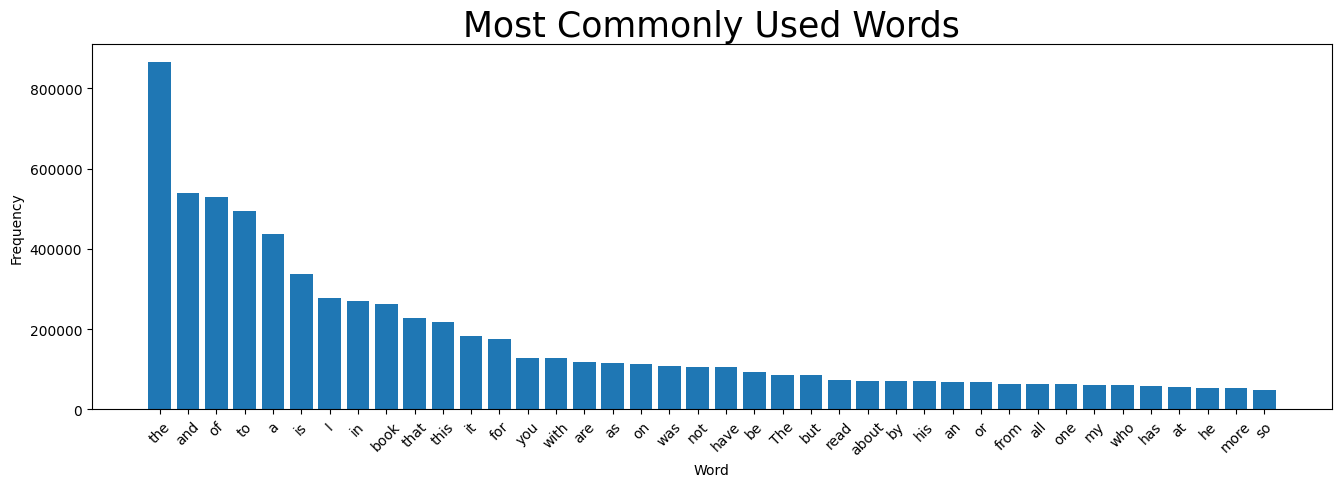

In [4]:
# evaluate most used words
def MostWordsUsed(txt , n_words) : 
    all_text = ''.join(df[txt].values) 
    
    all_text = re.sub(r'\d+', '', all_text) # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text) # special characters
    
    words = all_text.split() 
    
    word_counts = Counter(words)
    
    top_words = word_counts.most_common(n_words)
    
    return top_words

top_words = MostWordsUsed('Review' , 40)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16,5))
plt.bar(xaxis , yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [5]:
# split data into training set and validation set
# 'cleand_reviews' as feature variable and 'IsHelpful' as target that is to be predicted for training
# 80% of the data will be used for training
x_train , x_val , y_train , y_val = train_test_split(df['cleaned_reviews'] , df['IsHelpful'] , train_size = 0.80 , random_state = 42)
len(x_train) , len(x_val)

(109644, 27411)

In [6]:
# feature extraction
# "feature words" = eindeutigen Wörter oder Terme im Vokabular, die als Features für die Darstellung der Dokumente verwendet werden. Jedes Dokument wird als Vektor von TF-IDF-Werten für diese feature words dargestellt.

# Replace NaN with empty string
x_train = x_train.replace(np.nan, '', regex=True)

# Feature extraction
vec = TfidfVectorizer(max_features=6000) # ca 10% von Datensatz Phones
vec.fit(x_train)
print("No. of feature words: ", len(vec.get_feature_names_out()))

No. of feature words:  6000


In [7]:
x_train = vec.transform(x_train).toarray()
x_val = vec.transform(x_val).toarray()

## Logistic Regression

In [8]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train , y_train)

LogisticRegression(random_state=42)

In [21]:
train_acc1 = lr.score(x_train , y_train)

lr_pred = lr.predict(x_val)

val_acc1 = accuracy_score(y_val , lr_pred) 

val_precision1 = precision_score(y_val , lr_pred , average='weighted')
val_recall1 = recall_score(y_val , lr_pred , average='weighted')
val_f1score1 = f1_score(y_val , lr_pred , average='weighted')

print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1:0.2f}\n")

The training accuracy for logistic regression : 81.15%

The validation accuracy for logistic regression : 78.83%

The precision for logistic regression : 0.79

The recall for logistic regression : 0.79

The f1 score for logistic regression : 0.79



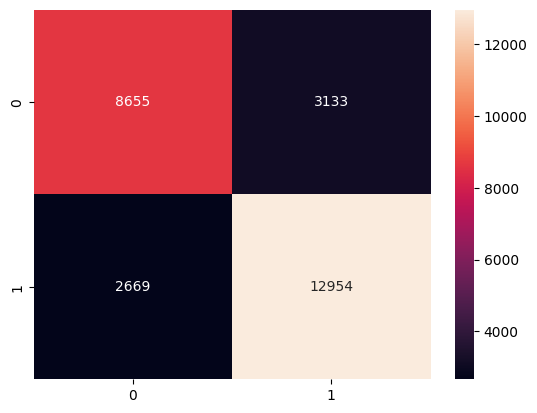

In [10]:
lr_cm = confusion_matrix(y_val , lr_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

## Random Forest

In [11]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [22]:
train_acc2 = rf.score(x_train , y_train)

rf_pred = rf.predict(x_val)

val_acc2 = accuracy_score(y_val , rf_pred) 

val_precision2 = precision_score(y_val , rf_pred , average='weighted')
val_recall2 = recall_score(y_val , rf_pred , average='weighted')
val_f1score2 = f1_score(y_val , rf_pred , average='weighted')

print(f"The training accuracy for Random Forest : {(train_acc2*100):0.2f}%\n")
print(f"The validation accuracy for Random Forest : {(val_acc2*100):0.2f}%\n")
print(f"The precision for Random Forest : {val_precision2:0.2f}\n")
print(f"The recall for Random Forest : {val_recall2:0.2f}\n")
print(f"The f1 score for Random Forest : {val_f1score2:0.2f}\n")

The training accuracy for Random Forest : 100.00%

The validation accuracy for Random Forest : 74.95%

The precision for Random Forest : 0.75

The recall for Random Forest : 0.75

The f1 score for Random Forest : 0.74



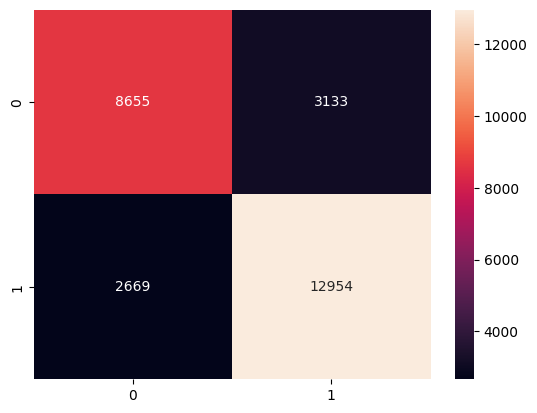

In [13]:
rf_cm = confusion_matrix(y_val , rf_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

## Compare Models

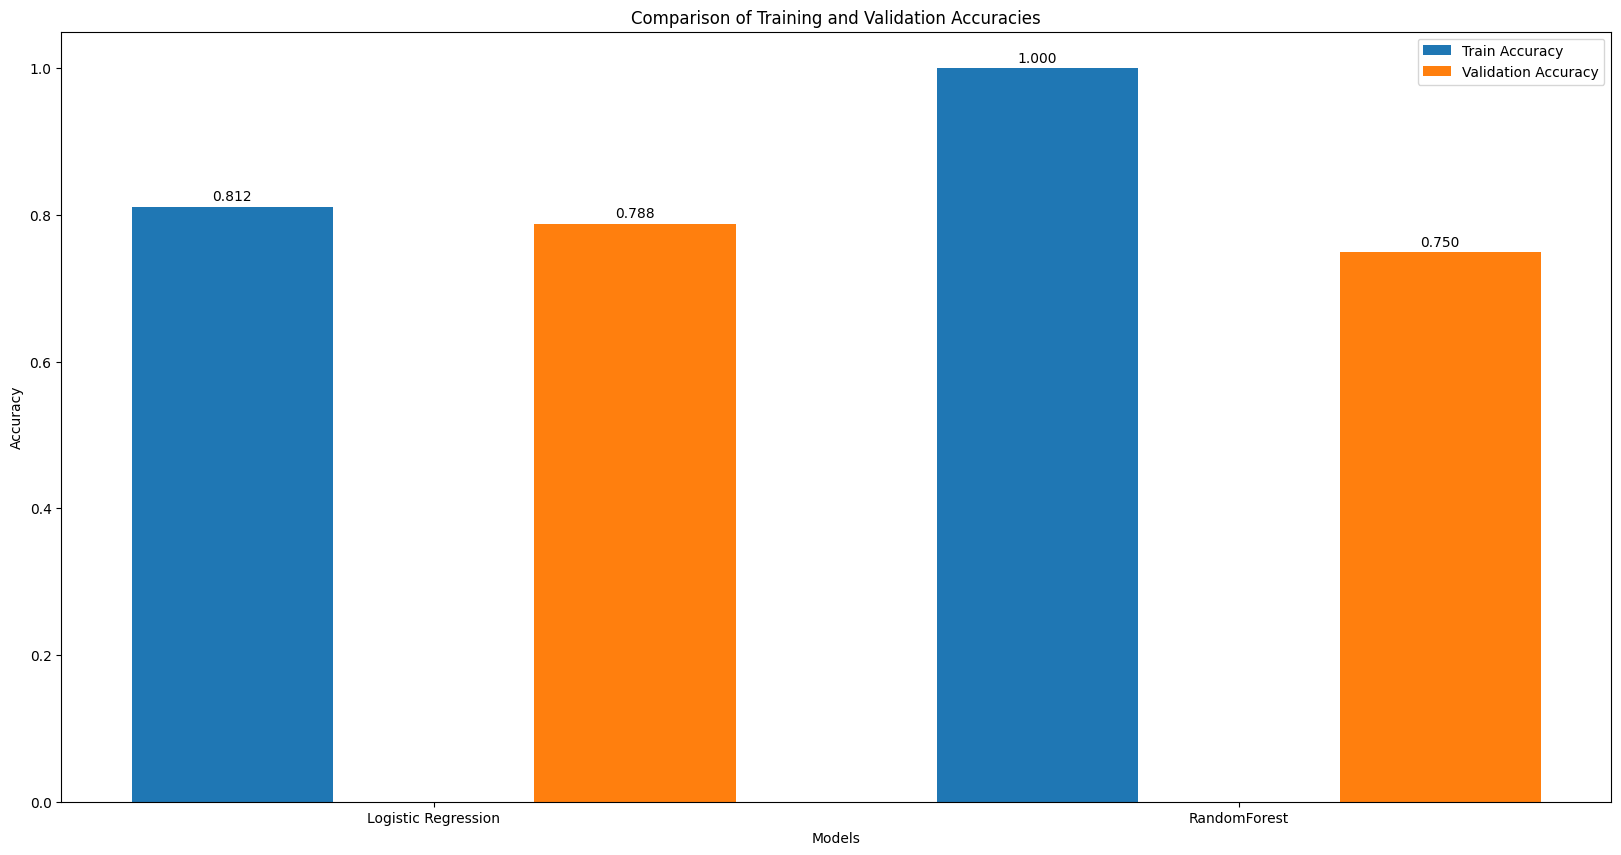

In [14]:
train_scores=[train_acc1,train_acc2]
val_scores=[val_acc1,val_acc2]

models = ['Logistic Regression','RandomForest']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, train_scores, width, label='Train Accuracy')

rects2 = ax.bar(x + width, val_scores, width, label='Validation Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Validation Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


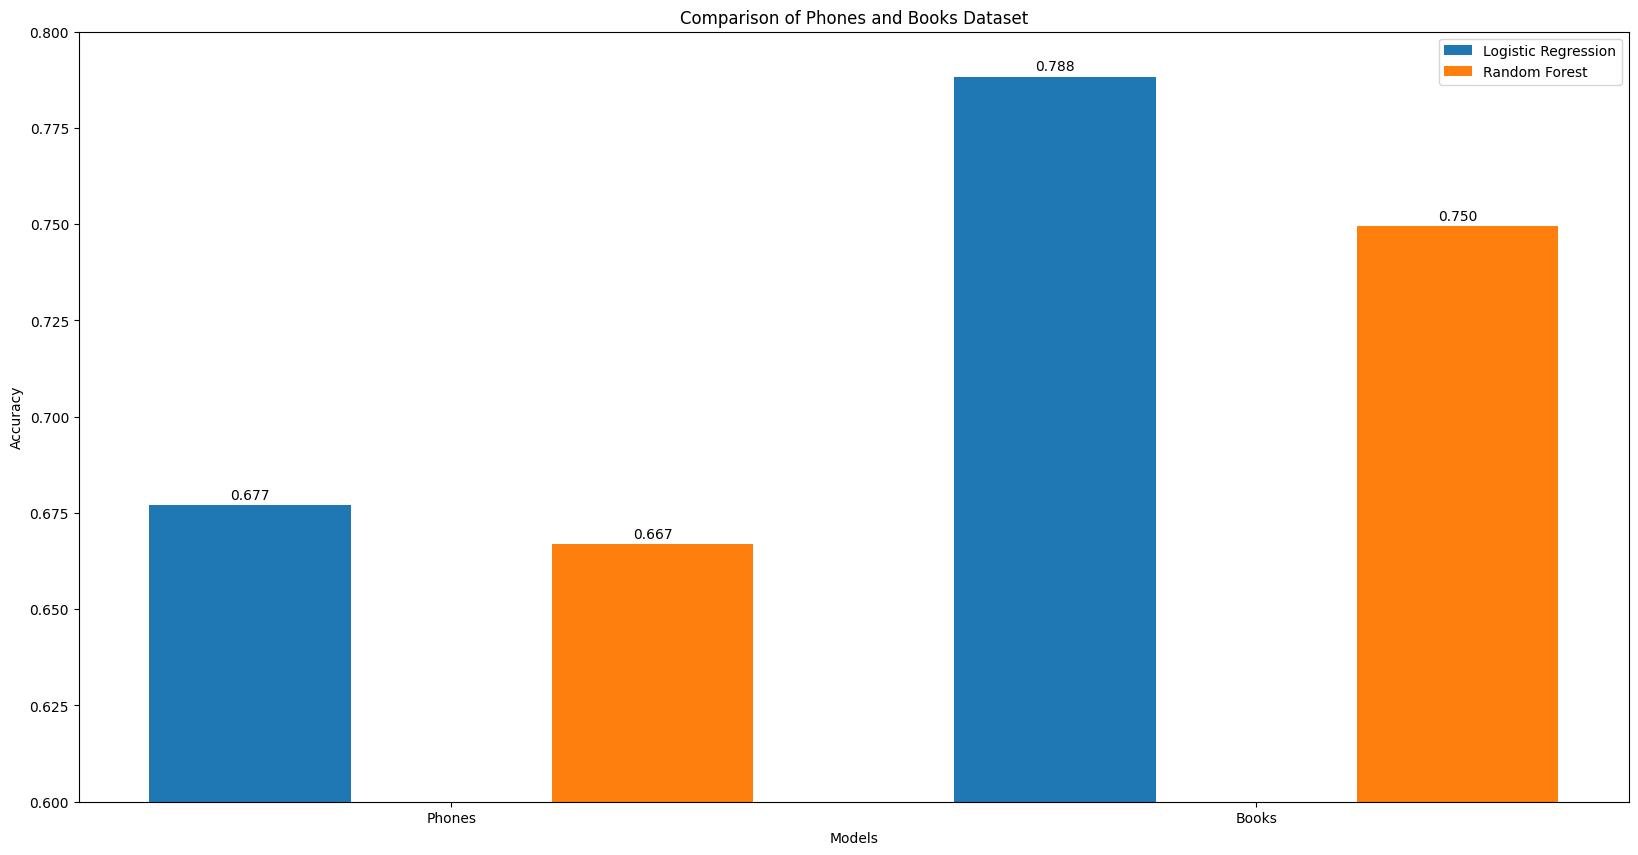

In [15]:
## Comparison of validation accuracy to smaller Dataset

lr_phones_books=[0.677,val_acc1]
rf_phones_books=[0.667,val_acc2]

models = ['Phones','Books']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, lr_phones_books, width, label='Logistic Regression')

rects2 = ax.bar(x + width, rf_phones_books, width, label='Random Forest')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Phones and Books Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(0.6, 0.8)


plt.show()

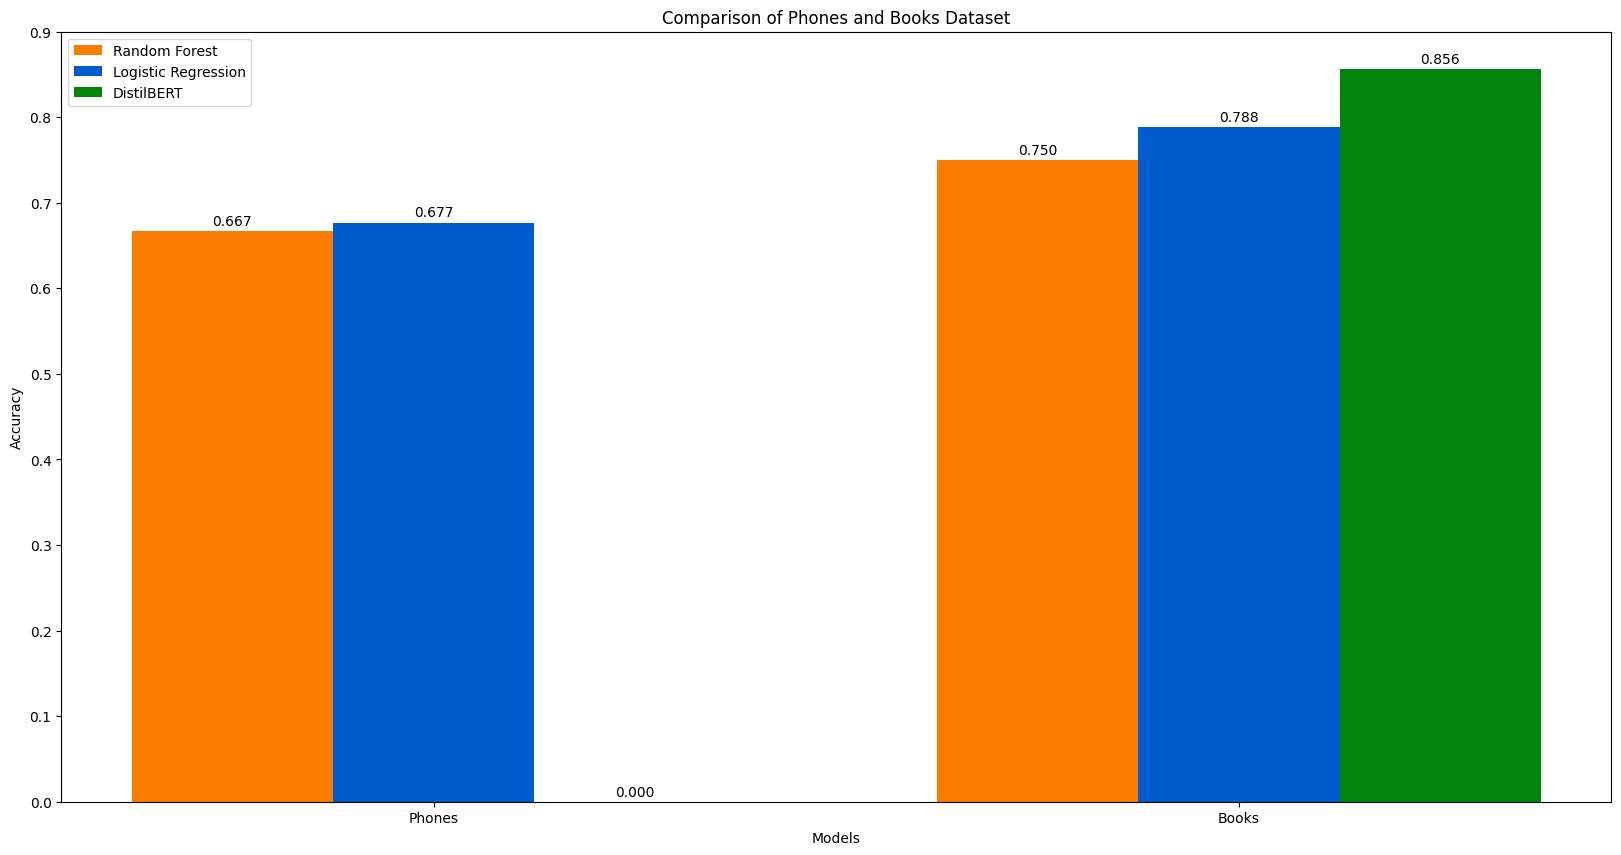

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Validation accuracies for Phones and Books datasets
lr_phones_books=[0.677,val_acc1]
rf_phones_books=[0.667,val_acc2]

# Validation accuracy for DistilBERT model on Books dataset
val_acc_distilbert_books = 0.856
distilbert_books = [0, val_acc_distilbert_books]  # Adding DistilBERT accuracy for Books dataset

models = ['Phones', 'Books']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, rf_phones_books, width, label='Random Forest', color='#fa7d00')
rects2 = ax.bar(x, lr_phones_books, width, label='Logistic Regression', color='#005ccc')
rects3 = ax.bar(x + width, distilbert_books, width, label='DistilBERT', color='#01850d')  # Adding DistilBERT bar

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Phones and Books Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylim(0.0, 0.9)  # Adjusting y-axis limits to accommodate the new accuracy value

plt.show()
